In [1]:
%matplotlib inline
import sklearn
import keras
import matplotlib.pylab as plt
import matplotlib as mp
import numpy as np
import scipy as sp

Using Theano backend.


In [2]:
#mp.style.use('seaborn-pastel')

In [3]:
datamatrix = sp.random.rand(10,100)<0.1

In [4]:
import scipy.io as sio
ft=sio.loadmat("firingTimes.mat")

In [5]:
ft.keys()

['totalTime',
 'spikes',
 'all_v_mat',
 'allSpikes',
 'firings2',
 '__header__',
 '__globals__',
 'allFirings',
 'firings',
 'neuronsWithInput',
 'spikes2',
 '__version__',
 'v_mat',
 'v_mat2']

/home/pritish/installations/python-venvs/moose/local/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


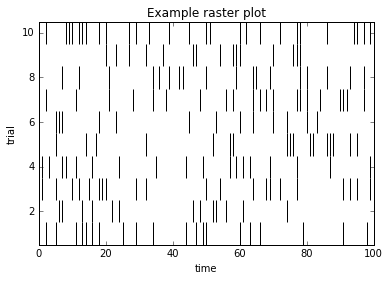

In [6]:
def raster(event_times_list, color='k'):
    """
    Creates a raster plot
    Parameters
    ----------
    event_times_list : iterable
                       a list of event time iterables
    color : string
            color of vlines
    Returns
    -------
    ax : an axis containing the raster plot
    """
    ax = plt.gca()
    for ith, trial in enumerate(event_times_list):
        plt.vlines(trial, ith + .5, ith + 1.5, color=color)
    plt.ylim(.5, len(event_times_list) + .5)
    return ax

nbins = 100
ntrials = 10
spikes = []
for i in range(ntrials):
    spikes.append(np.arange(nbins)[np.random.rand(nbins) < .2])

fig = plt.figure()
ax = raster(spikes)
plt.title('Example raster plot')
plt.xlabel('time')
plt.ylabel('trial')
fig.show()

# Figure 1 :

In [7]:
print ft.keys()
allSpikes=ft['allSpikes']
totalTime=ft['totalTime']*1.0
neuronsWithInput=ft['neuronsWithInput']
neuronsWithInput_array=np.zeros(160)
neuronsWithInput_array[neuronsWithInput]=1
# print neuronsWithInput_array


['totalTime', 'spikes', 'all_v_mat', 'allSpikes', 'firings2', '__header__', '__globals__', 'allFirings', 'firings', 'neuronsWithInput', 'spikes2', '__version__', 'v_mat', 'v_mat2']


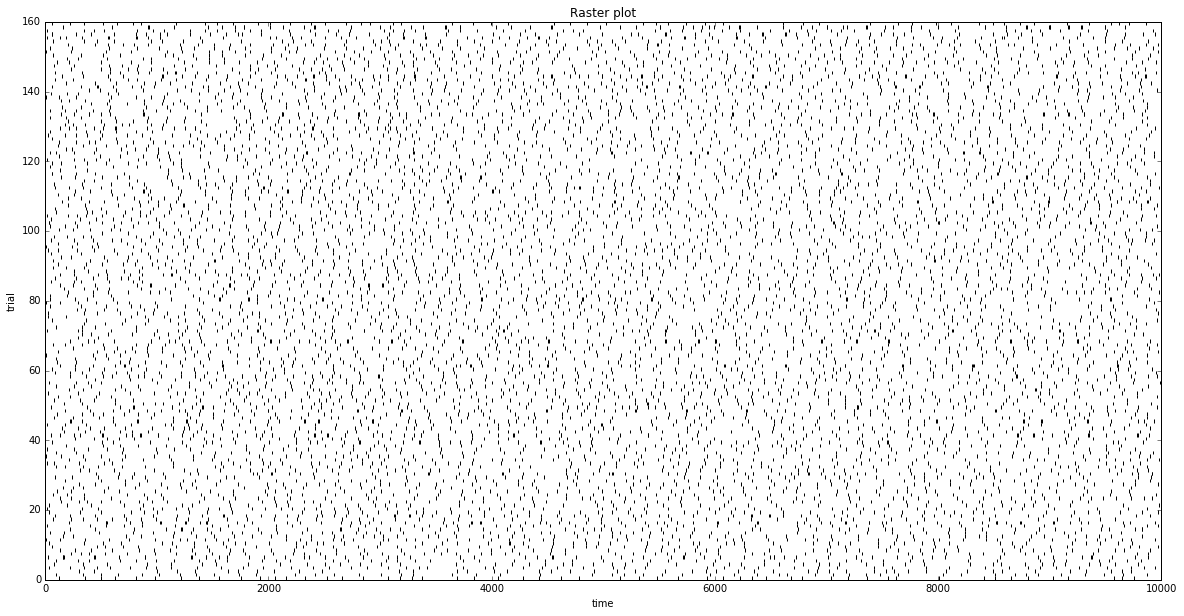

In [8]:
neurons,time=np.where(allSpikes==1)
# plt.figure(figsize=(10, 10))
# plt.scatter(time,neurons,color="k",marker='|')
# plt.show()

plt.figure(figsize=(20, 10))
plt.vlines(time,neurons,neurons+1)
plt.title('Raster plot')
plt.xlabel('time')
plt.ylabel('trial')
plt.show()

# Figure 2

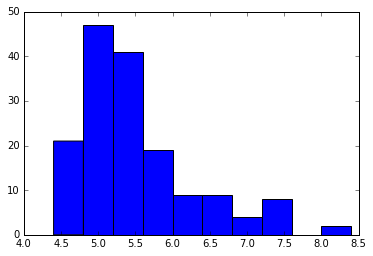

In [9]:
sp_per_sec = np.array(sum(allSpikes.T,1)/totalTime*1000)[0] #; % spikes per sec
# print sp_per_sec
plt.figure()
plt.hist(sp_per_sec,bins=10)
plt.show()

# Figure 3 

<function matplotlib.pyplot.colorbar>

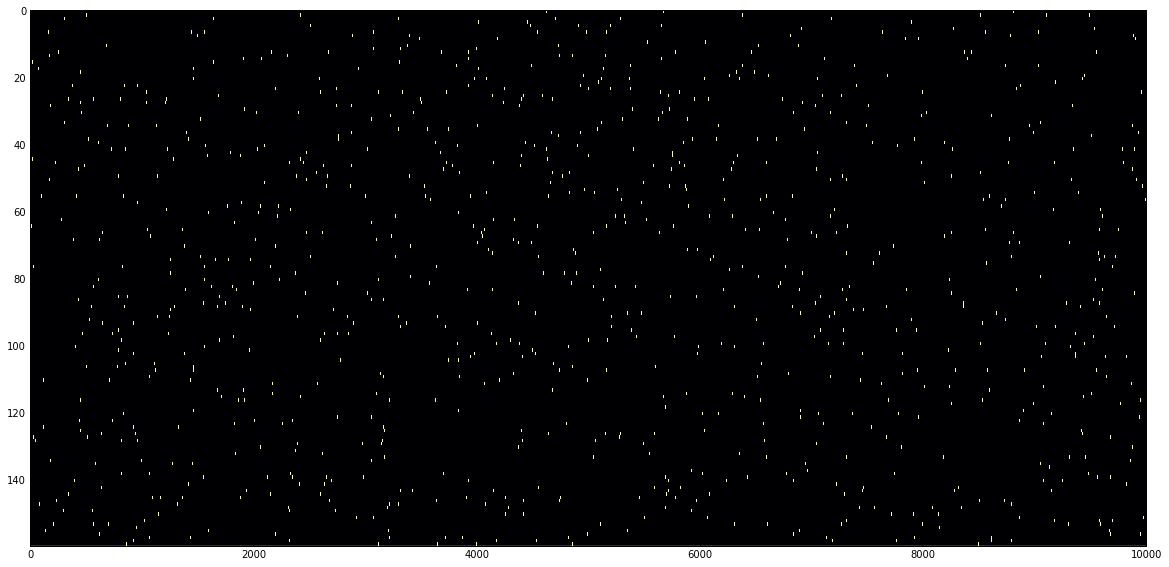

In [10]:
#print allSpikes[0,:]
plt.figure(figsize=(20, 10))
plt.imshow(allSpikes,aspect=30,cmap='magma',interpolation="None")
plt.colorbar

In [80]:
#arr=sp.ndimage.filters.gaussian_filter1d(allSpikes[1:3,:],10,mode='constant')
unif_filter=np.zeros(allSpikes.shape)
gaus_filter=np.zeros(allSpikes.shape)
#plt.imshow(allSpikes*1000,aspect=40)
for i in range(allSpikes.shape[0]):
    unif_filter[i,:]=sp.ndimage.filters.uniform_filter1d(allSpikes[i,:]*1000,300,mode='wrap')
    gaus_filter[i,:]=sp.ndimage.filters.gaussian_filter1d(allSpikes[i,:]*1000,300,mode='wrap')

    


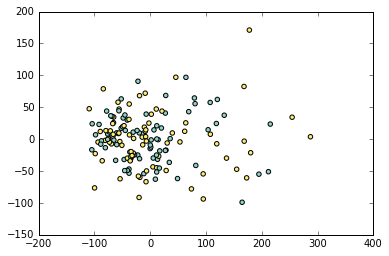

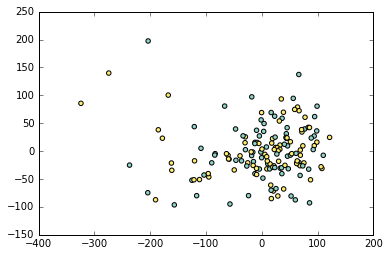

In [70]:
from sklearn.decomposition import PCA, FactorAnalysis
#pca = PCA(n_components=2).fit(gaus_filter - np.mean(gaus_filter))
reduced_data = PCA(n_components=2).fit_transform(gaus_filter - np.mean(gaus_filter))
plt.scatter(reduced_data[:,0],reduced_data[:,1],c=neuronsWithInput_array,cmap='Set3')
plt.show()

reduced_data = PCA(n_components=2).fit_transform(unif_filter - np.mean(unif_filter))
plt.scatter(reduced_data[:,0],reduced_data[:,1],c=neuronsWithInput_array,cmap='Set3')
plt.show()

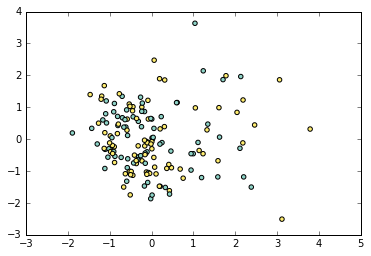

In [71]:
reduced_data = FactorAnalysis(n_components=2).fit_transform(gaus_filter - np.mean(gaus_filter))
plt.scatter(reduced_data[:,0],reduced_data[:,1],c=neuronsWithInput_array,cmap='Set3')
plt.show()

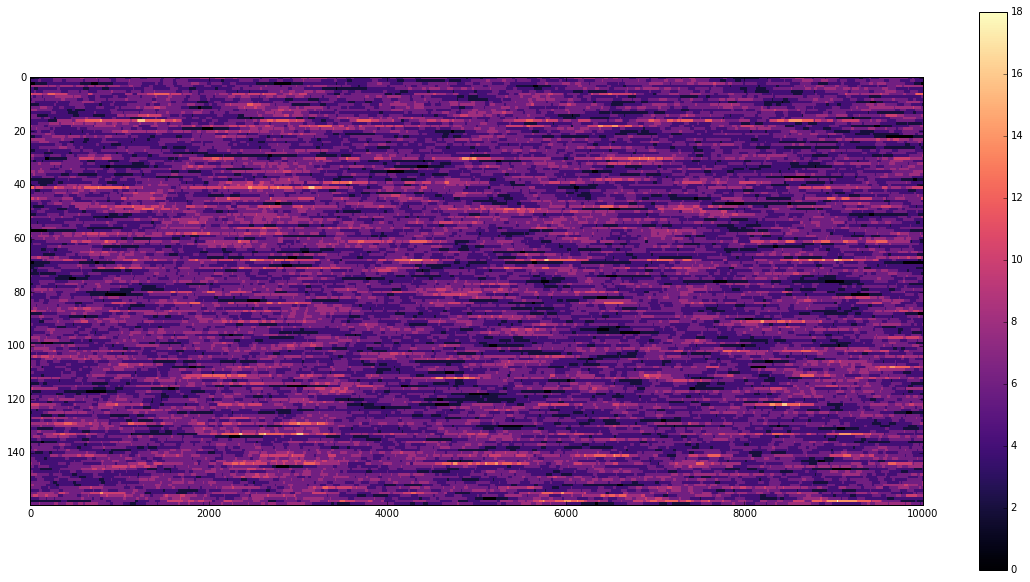

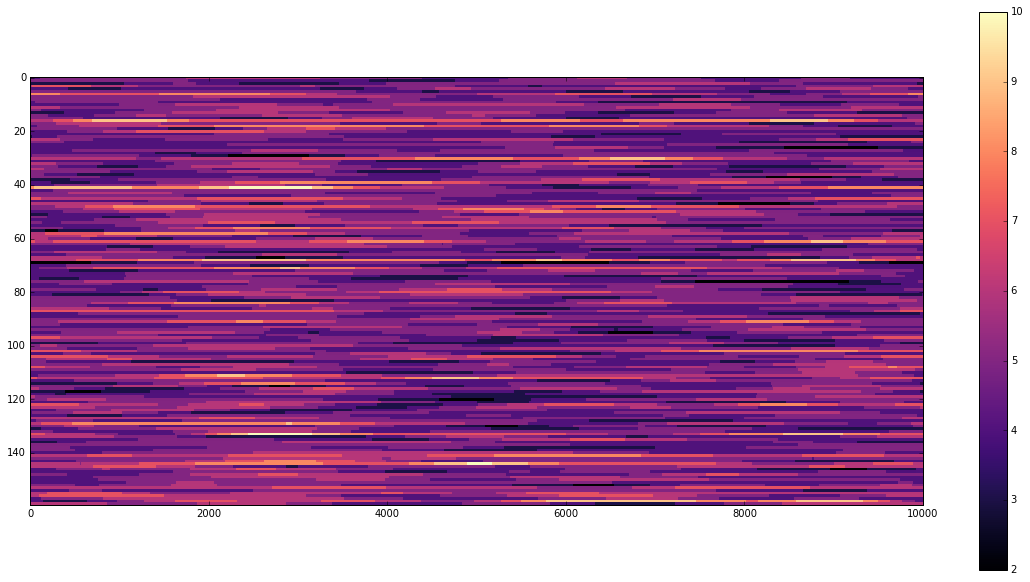

In [72]:
plt.figure(figsize=(20, 10))
plt.imshow(unif_filter,aspect=30,cmap='magma',interpolation="None")
plt.colorbar()

plt.figure(figsize=(20, 10))
plt.imshow(gaus_filter,aspect=30,cmap='magma',interpolation="None",)
plt.colorbar()

# PSTH

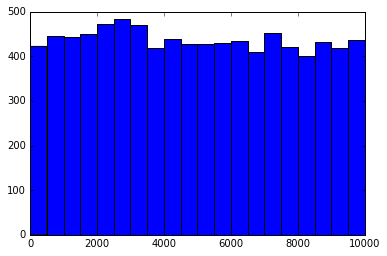

In [15]:
plt.hist(time,bins=10000/500)
plt.show()

# add the sample kmeans from the sklearn example.

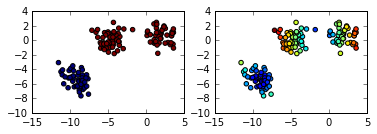

In [16]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


n_samples = 150
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)



# Incorrect number of clusters

km=KMeans(n_clusters=2, random_state=random_state)
y_pred = km.fit_predict(X)
labels=km.labels_
cluster_centers=km.cluster_centers_

        

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)


def calc_dist(labels,X,cluster_centers):
    Y=np.zeros(X.shape[0])
    for i,j in enumerate(labels):
        Y[i]=np.linalg.norm(X[i,:]-cluster_centers[j])
#     print Y
    return Y

dist = calc_dist(labels,X,cluster_centers)

plt.subplot(222)
plt.scatter(X[:, 0], X[:, 1], c=dist)


In [17]:
#print KMeans.__doc__

# GLM

In [29]:
from sklearn import svm
traindata=np.zeros(gaus_filter.shape[1])
traindata[500:3500]=1
print traindata.shape
#plt.imshow(traindata,aspect=40,cmap='magma')




(10000,)


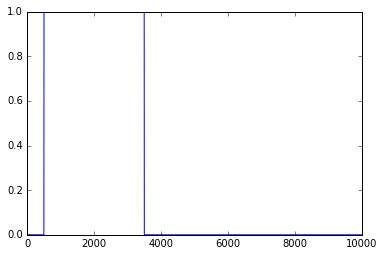

In [37]:
clf = svm.SVC(kernel='linear')
clf.fit(gaus_filter.T, traindata)  
pre=clf.predict(gaus_filter.T)
plt.plot(pre)


[BernoulliRBM] Iteration 1, pseudo-likelihood = -4742.97, time = 0.17s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -12990.39, time = 0.23s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -29487.11, time = 0.23s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -25563.33, time = 0.23s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -20286.21, time = 0.23s


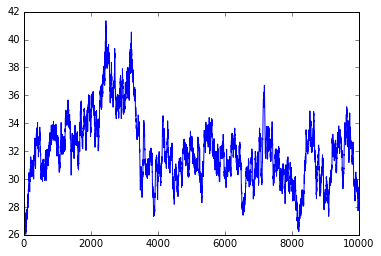

In [91]:
from sklearn.neural_network import BernoulliRBM
rbm = BernoulliRBM( verbose=True,n_components=2,n_iter=5)
rbm.fit(unif_filter)
plt.plot(rbm.components_[0,:])
# plt.plot(rbm.components_[1,:])
plt.show()

# rbm = BernoulliRBM( verbose=True,n_components=5,n_iter=5)
# rbm.fit(gaus_filter)
# plt.plot(rbm.components_[0,:])
# plt.plot(rbm.components_[1,:])
# plt.show()

In [92]:
# rbm.transform(gaus_filter)

array([[  1.00000000e+000,   4.45822776e-259],
       [  1.00000000e+000,   5.35615383e-238],
       [  1.00000000e+000,   2.84227094e-228],
       [  1.00000000e+000,   4.13129903e-259],
       [  1.00000000e+000,   6.44612708e-240],
       [  1.00000000e+000,   3.45942321e-227],
       [  1.00000000e+000,   0.00000000e+000],
       [  1.00000000e+000,   1.12797925e-255],
       [  1.00000000e+000,   1.37967389e-254],
       [  1.00000000e+000,   1.00373880e-227],
       [  1.00000000e+000,   7.66122380e-271],
       [  1.00000000e+000,   1.99437046e-289],
       [  1.00000000e+000,   1.23448590e-268],
       [  1.00000000e+000,   3.61666684e-239],
       [  1.00000000e+000,   4.36497769e-269],
       [  1.00000000e+000,   3.56483361e-226],
       [  1.00000000e+000,   0.00000000e+000],
       [  1.00000000e+000,   3.11238386e-239],
       [  1.00000000e+000,   0.00000000e+000],
       [  1.00000000e+000,   6.59845703e-269],
       [  1.00000000e+000,   2.29299561e-254],
       [  1.0

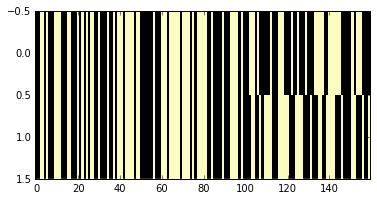

32


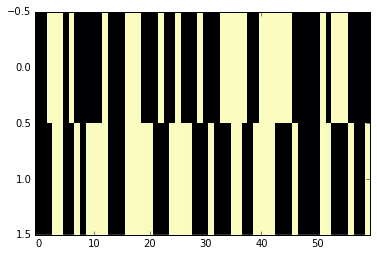

In [113]:
from sklearn.svm import SVR
svr_lin = SVR(kernel='linear', C=1e3)
y_lin = svr_lin.fit(gaus_filter[0:100,:], neuronsWithInput_array[0:100]).predict(gaus_filter)
plt.imshow([y_lin>0.5,neuronsWithInput_array],aspect=40,interpolation='none',cmap='magma')
plt.show()
plt.imshow([y_lin[100:]>0.5,neuronsWithInput_array[100:]],aspect=20,interpolation='none',cmap='magma')
print sum((y_lin[100:]>0.5) ==(neuronsWithInput_array[100:]))